In [ ]:
!wget http://cb.lk/covid_19
!unzip covid_19

--2021-11-24 09:26:22--  http://cb.lk/covid_19
Resolving cb.lk (cb.lk)... 172.67.187.81, 104.21.72.203, 2606:4700:3031::6815:48cb, ...
Connecting to cb.lk (cb.lk)|172.67.187.81|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cb.lk/covid_19 [following]
--2021-11-24 09:26:22--  https://cb.lk/covid_19
Connecting to cb.lk (cb.lk)|172.67.187.81|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0 [following]
--2021-11-24 09:26:23--  https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip [following]
--2021-11

In [ ]:
#!unzip covid_19

In [ ]:
import keras 

from keras.models import *
from keras.layers import *
from keras.preprocessing import image 
from tensorflow.keras.applications import DenseNet121
import PIL

In [ ]:
# Download the architecture of DenseNet121 with ImageNet weights
base_model = DenseNet121(include_top=False, weights='imagenet')
 
# Taking the output of the last convolution block in ResNet50
x = base_model.output
 
# Adding a Global Average Pooling layer
x = GlobalAveragePooling2D()(x)
 
# Adding a fully connected layer having 1024 neurons
x = Dense(1024, activation='relu')(x)
 
# Adding a fully connected layer having 2 neurons which will
# give the probability of image having either dog or cat
predictions = Dense(2, activation='softmax')(x)
 
# Model to be trained
model = Model(inputs=base_model.input, outputs=predictions)
 
# Training only top layers i.e. the layers which we have added in the end
for layer in base_model.layers:
    layer.trainable = False

model.compile(loss=keras.losses.categorical_crossentropy, optimizer="adam", metrics=['accuracy'])


29097984/29084464 [==============================] - 0s 0us/step


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
import os
main_dir = "/content/CovidDataset"
train_data = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_data = ImageDataGenerator(rescale=1./255)

train_dir = os.path.join(main_dir, "Train")
training_set = train_data.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)
test_dir = os.path.join(main_dir, "Val")
test_set = test_data.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'

)





Found 224 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [ ]:
results=model.fit_generator(
    training_set,
    steps_per_epoch=2,
    epochs=20,
    validation_data=test_set,
    validation_steps=2
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/20
2/2 [==============================] - 26s 8s/step - loss: 2.5592 - accuracy: 0.2656 - val_loss: 1.5087 - val_accuracy: 0.5000
Epoch 2/20
2/2 [==============================] - 5s 4s/step - loss: 0.7186 - accuracy: 0.7344 - val_loss: 1.1608 - val_accuracy: 0.5000
Epoch 3/20
2/2 [==============================] - 5s 4s/step - loss: 0.7208 - accuracy: 0.5781 - val_loss: 0.1379 - val_accuracy: 0.9500
Epoch 4/20
2/2 [==============================] - 5s 4s/step - loss: 0.1628 - accuracy: 0.9688 - val_loss: 0.1175 - val_accuracy: 0.9333
Epoch 5/20
2/2 [==============================] - 6s 4s/step - loss: 0.0867 - accuracy: 0.9688 - val_loss: 0.5017 - val_accuracy: 0.8167
Epoch 6/20
2/2 [==============================] - 5s 4s/step - loss: 0.4555 - accuracy: 0.8438 - val_loss: 0.3236 - val_accuracy: 0.8667
Epoch 7/20
2/2 [==============================] - 5s 4s/step - loss: 0.3412 - accuracy: 0.8594 - val_loss: 0.0397 - val_accuracy: 0.9833
Epoch 8/20
2/2 [========================

In [ ]:
results.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

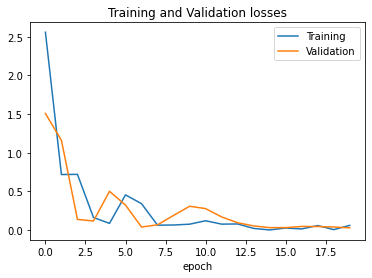

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation losses')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

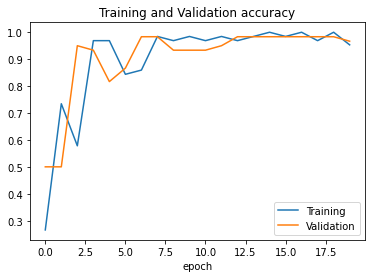

In [ ]:
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation accuracy')
plt.xlabel('epoch')

In [ ]:
test_loss, test_acc = model.evaluate(test_set)
print('test loss :{}   test accuracy :{}'.format(test_loss,test_acc))

2/2 [==============================] - 2s 1s/step - loss: 0.0292 - accuracy: 0.9667
test loss :0.02916327305138111   test accuracy :0.9666666388511658
